In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression, make_classification, make_blobs
from sklearn.decomposition import PCA
from sklearn import preprocessing

from multiprocessing import Pool
from functools import partial

from CrossValidation import *
from FeatureSimilarity import GetTopGenes
from MatrixFactorization import CreateLatentVariables, FactorizeMatrix, GetRepresentationError

from utils import *

In [24]:
n = 100
g = 1100
o = 100
k = 20

In [25]:
def DFtoDataset(df, scale=False):
    X = df[[str(i) for i in np.arange(n)]].values.T
    if (scale):
        X = preprocessing.scale(X)
    y_cls = df['gene_group'].values[o:].astype(np.int32)
    binaryPathwayMatrix = np.zeros((g, k))
    binaryPathwayMatrix[np.arange(o, g), y_cls] = 1
    geneCoeffs = df[['coeff{}'.format(i) for i in range(o)]].values[o:, :]  

    return X, binaryPathwayMatrix, geneCoeffs

In [26]:
dataFileBase = '/homes/gws/psturm/simulatedData/regressionData/df{}.csv'

In [27]:
df = pd.read_csv(dataFileBase.format(0))
X, binaryPathwayMatrix, geneCoeffs = DFtoDataset(df, scale=True)
neighbors=GetNeighborDictionary(binaryPathwayMatrix)
X_half = X[:, np.concatenate([range(0, int(o/2)), range(o, g)])]
X_one = X[:, np.concatenate([[0], range(o, g)])]

In [28]:
X_scaled = preprocessing.scale(X)

In [29]:
pca_model = PCA()
pca_model.fit(X_scaled)
latent_dim = np.min(np.where(np.cumsum(pca_model.explained_variance_ratio_) > 0.95)[0])
latent_dim

16

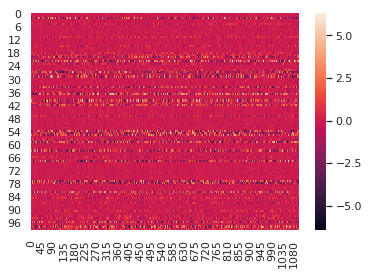

In [ ]:
sns.heatmap(X_scaled)

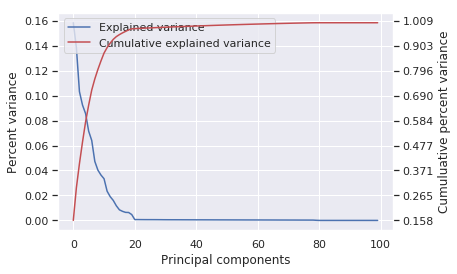

In [ ]:
ScreePlot(X_scaled)

In [ ]:
num_folds=5
hyper_params = RandomParams(eta_low=0.05, eta_high=0.15, lamb1_low=0.01, lamb1_high=0.04, lamb2_low=0.001, lamb2_high=0.01, num_reps=50)
errorsDF, trainErrorDF, testErrorDF = CrossValidation(X_scaled, latent_dim, hyper_params, neighbors=neighbors, foldcount=num_folds, returnVectorDF=True)

Training fold 0
Training fold 1
Training fold 2
Training fold 3
Training fold 4
..........................................................................................................................................................................................................................................................

In [40]:
meanErrorsDf = GetMeanErrorDF(errorsDF, num_folds)
bestParamsIndex = meanErrorsDf['error'].idxmin(axis=1)
eta, lamb1, lamb2, _ = meanErrorsDf.iloc[bestParamsIndex].values
print(meanErrorsDf.iloc[bestParamsIndex])

eta      0.077008
lamb1    0.011143
lamb2    0.001842
error    0.158167
Name: 32, dtype: float64


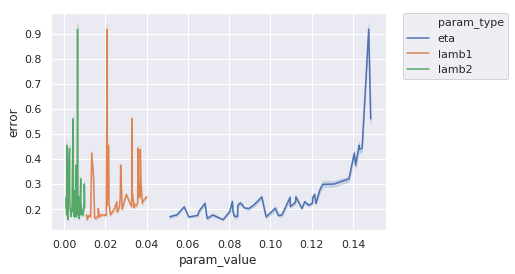

In [41]:
PlotParamDF(errorsDF)

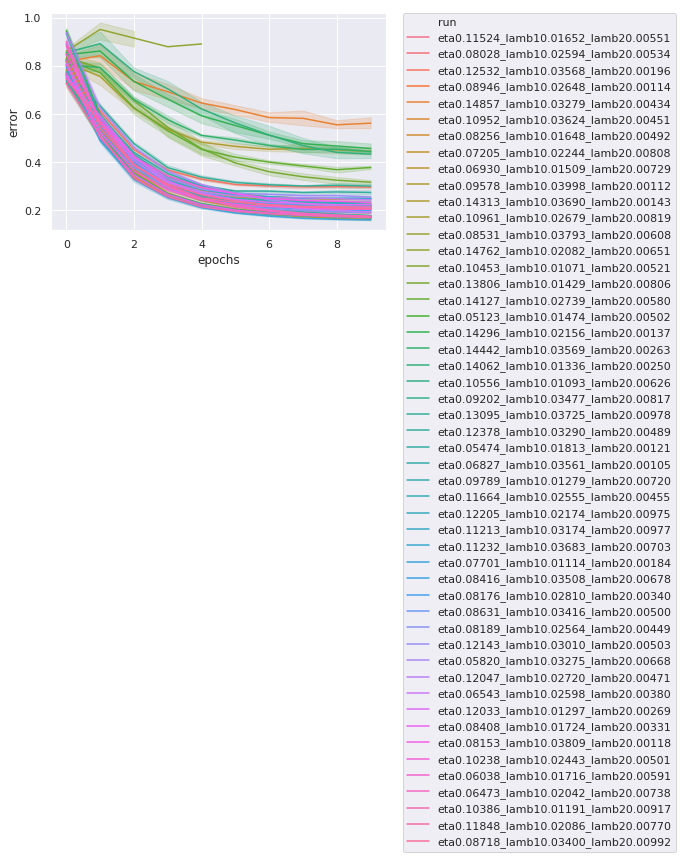

In [42]:
PlotErrorDF(testErrorDF)

In [ ]:
hyper_params_nn = RandomParams(eta_low=0.05, eta_high=0.15, lamb1_low=0.01, lamb1_high=0.04, lamb2_low=0.0, lamb2_high=0.0, num_reps=50)
errorsDF_nn, trainErrorDF_nn, testErrorDF_nn = CrossValidation(X_scaled, latent_dim, hyper_params_nn, neighbors={}, foldcount=5, returnVectorDF=True)

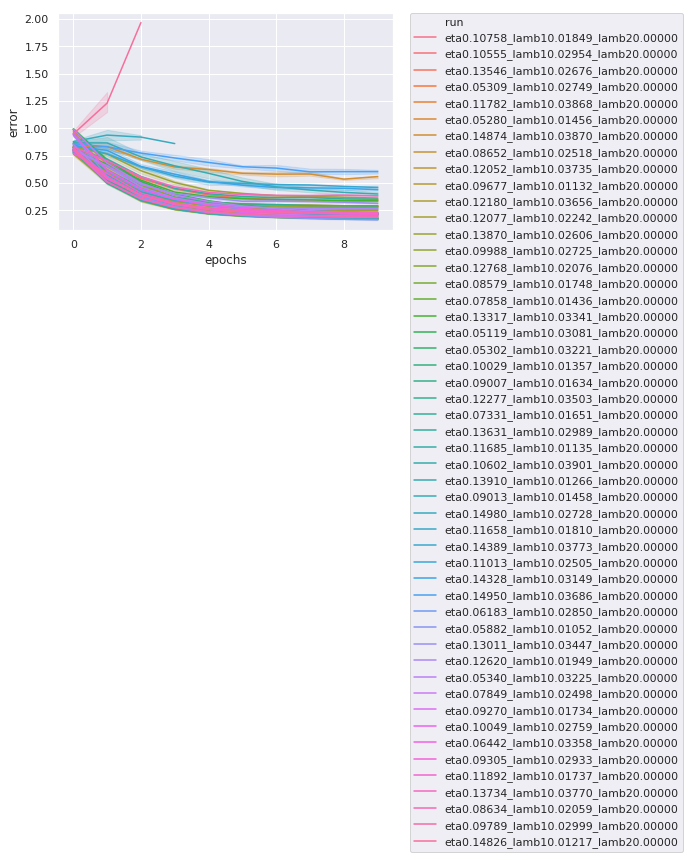

In [43]:
PlotErrorDF(testErrorDF_nn)

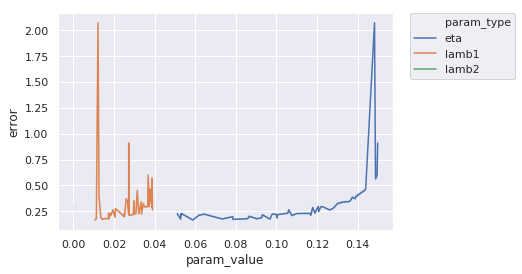

In [44]:
PlotParamDF(errorsDF_nn)

In [45]:
meanErrorsDf_nn = GetMeanErrorDF(errorsDF_nn, num_folds)
bestParamsIndex_nn = meanErrorsDf_nn['error'].idxmin(axis=1)
eta_nn, lamb1_nn, lamb2_nn, _ = meanErrorsDf_nn.iloc[bestParamsIndex_nn].values
print(meanErrorsDf_nn.iloc[bestParamsIndex_nn])

eta      0.058818
lamb1    0.010516
lamb2    0.000000
error    0.166144
Name: 36, dtype: float64
